In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Mecab

%matplotlib inline
mecab = Mecab()

In [2]:
doc1 = pd.read_csv('/home/devcat/data/AA/kaggle_chat.csv', encoding='utf-8')
doc2 = pd.read_csv('/home/devcat/data/AA/python_chat.csv', encoding='utf-8')
doc3 = pd.read_csv('/home/devcat/data/AA/torch_chat.csv', 
encoding='utf-8')
stop_words = pd.read_csv('./stopwords.txt',encoding='utf-8')
data = pd.concat([doc1,doc2,doc3])

In [3]:
def process(df):
    doc = df['Message'].tolist()
    clean_doc = []
    for sen in doc:
        if 'chatroom' in sen:
            continue
        elif 'Photo' in sen:
            continue
        elif 'this' in sen:
            continue
        else:clean_doc.append(sen)

    return clean_doc

def regex(readData):
    text = re.sub('[0123456789.a.b.c.d.e.f.g.h.i.j.k.l.m.n.o.p.q.r.s.t.u.v.w.x.y.z;\-\_=+#/\?:^$.,@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', readData)
 
    return text

In [4]:
stop_words = stop_words['words'].tolist()
clean_doc = process(data)
keyword = [mecab.nouns(sen) for sen in clean_doc]
keyword = list(itertools.chain.from_iterable(keyword))
keyword = [word for word in keyword if word not in stop_words]
count = Counter(keyword)
key_count = {n:c for n, c in count.most_common(100) if len(n)>=2}

In [5]:
key_count

{'파이썬': 558,
 '데이터': 369,
 '코드': 351,
 '문제': 269,
 '사용': 264,
 '함수': 254,
 '질문': 239,
 '파일': 217,
 '방법': 214,
 '공부': 209,
 '생각': 200,
 '모델': 164,
 '말씀': 158,
 '코딩': 158,
 '실행': 155,
 '설치': 152,
 '가능': 149,
 '에러': 149,
 '오류': 149,
 '경우': 136,
 '이해': 127,
 '출력': 127,
 '러닝': 123,
 '변수': 119,
 '클래스': 117,
 '결과': 112,
 '정도': 110,
 '리스트': 109,
 '필요': 105,
 '확인': 104,
 '입력': 104,
 '이름': 101,
 '설정': 96,
 '이미지': 96,
 '관련': 95,
 '경로': 95,
 '시작': 93,
 '답변': 92,
 '해결': 92,
 '언어': 90,
 '검색': 88,
 '추천': 87,
 '강의': 86,
 '저장': 85,
 '모듈': 82,
 '자료': 81,
 '학습': 78,
 '사람': 78,
 '참고': 76,
 '토치': 76,
 '차이': 75,
 '구현': 75,
 '환경': 74,
 '때문': 73,
 '라이브러리': 73,
 '분석': 71,
 '버전': 71,
 '설명': 70,
 '이유': 69,
 '회사': 68,
 '도움': 67,
 '프로그램': 67,
 '개발': 66,
 '알고리즘': 64,
 '처음': 64,
 '머신': 63,
 '논문': 62,
 '메모리': 62,
 '정보': 61,
 '걸로': 60,
 '자체': 60,
 '이용': 59}

In [5]:
from wordcloud import WordCloud
font_path = '/home/devcat/anaconda3/envs/devcat/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf'
wordcloud = WordCloud(
    font_path = font_path,
    width=800,
    height=800,
    background_color='white'
)
wordcloud = wordcloud.generate_from_frequencies(key_count)
img_array = np.array(wordcloud.to_image())

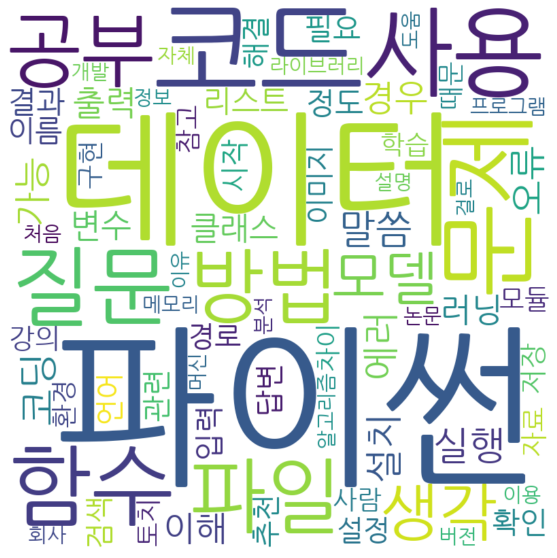

In [6]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(img_array, interpolation="bilinear")
plt.axis("off")
plt.show()